In [1]:
# This notebook integrates results generated by GPT-4 to the original dataset

In [67]:
import pandas as pd
import numpy as np

df = pd.read_parquet('../processed_data/with_sentiment.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5583 entries, 24 to 6380
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tid            5583 non-null   int64  
 1   author         5583 non-null   object 
 2   description    5583 non-null   object 
 3   image          5583 non-null   object 
 4   replies        5583 non-null   int64  
 5   timestamp      5583 non-null   int64  
 6   title          5583 non-null   object 
 7   views          5583 non-null   int64  
 8   date           5583 non-null   object 
 9   thread_url     5583 non-null   object 
 10  pc_thread_url  5583 non-null   object 
 11  nickname       5583 non-null   object 
 12  circleId       5583 non-null   object 
 13  circleName     5583 non-null   object 
 14  threadType     5583 non-null   int64  
 15  topicId        5583 non-null   object 
 16  topicName      5583 non-null   object 
 17  images         5583 non-null   object 
 18  score       

In [68]:
# Load in chatgpt result
import json
from pathlib import Path
fpath = Path('../sentiment_and_topic.json')
result = json.loads(fpath.read_text())

In [69]:
gpt_df = pd.DataFrame.from_dict(result, orient='index', columns=['reason', 'topic', 'result'])
gpt_df.reset_index(inplace=True)
gpt_df.rename(columns={'index': 'tid'}, inplace=True)
gpt_df['tid'] = pd.to_numeric(gpt_df['tid'])
gpt_df.info()
gpt_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583 entries, 0 to 5582
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tid     5583 non-null   int64 
 1   reason  5583 non-null   object
 2   topic   5583 non-null   object
 3   result  5583 non-null   object
dtypes: int64(1), object(3)
memory usage: 174.6+ KB


,tid,reason,topic,result
0,4205515,"The text warns truck drivers to be cautious with orders dispatched by the information department on the Manbang platform, indicating a sense of distrust or concern towards these orders. The cautionary tone suggests a negative sentiment towards the Manbang platform, especially regarding the reliability or trustworthiness of the orders posted by its information department.",Caution advised for Manbang platform's information department orders,2
1,4185093,"The text suggests that if Manbang (满帮) treats its drivers with sincerity, it would be considered a good platform. This indicates a conditional positive perception, dependent on the platform's attitude towards its drivers. The sentiment is mildly positive, assuming Manbang could improve or maintain a good relationship with its drivers. Therefore, it’s not an outright endorsement but suggests potential for positivity.",The conditional positive assessment of Manbang by a truck driver based on the treatment towards drivers.,5
2,4192184,"The main topic of the text is a truck driver expressing frustration over their 货车帮 (HuoCheBang) account being permanently banned, and seeking alternatives for receiving orders while traveling nationwide. The sentiment is more towards the negative side because the permanent suspension of an account denotes a serious problem or dissatisfaction from the user's side. However, the text does not convey extreme anger or distress but rather a concern about finding alternatives, which prevents the sentiment score from being the lowest possible.",A truck driver's account on HuoCheBang being permanently banned and seeking alternative platforms for nationwide orders.,2
3,4092040,"The text discusses the anticipated launch of Sany's freight platform and its potential impact on existing platforms like Yunmanman and Huochebang. It implies a positive outlook by mentioning that feedback from truck drivers was considered in its development, expressing gratitude towards chairman Liang Linhe for this approach.",The potential impact of the launch of Sany's freight platform on existing platforms and the involvement of truck drivers in its development.,6
4,4061942,"The text discusses issues faced by truck drivers using online freight platforms, such as unfair competition, multiple fees, and operating violations. It highlights the negative impact of these practices on drivers' earnings and rights, with platforms being accused of exploiting drivers through price suppression and excessive commissions. The need for regulatory improvements and legal support for drivers to safeguard their rights and improve the industry's working environment is emphasized. Overall, the sentiment towards the platforms is negative, given the exploitation and the call for immediate reforms.","Truck drivers face exploitation and unfair practices on freight transportation platforms, necessitating regulatory and legal improvements to protect their rights.",2


In [70]:
# Merge df and gpt_df by tid
df_all = pd.merge(df, gpt_df, on='tid')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583 entries, 0 to 5582
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tid            5583 non-null   int64  
 1   author         5583 non-null   object 
 2   description    5583 non-null   object 
 3   image          5583 non-null   object 
 4   replies        5583 non-null   int64  
 5   timestamp      5583 non-null   int64  
 6   title          5583 non-null   object 
 7   views          5583 non-null   int64  
 8   date           5583 non-null   object 
 9   thread_url     5583 non-null   object 
 10  pc_thread_url  5583 non-null   object 
 11  nickname       5583 non-null   object 
 12  circleId       5583 non-null   object 
 13  circleName     5583 non-null   object 
 14  threadType     5583 non-null   int64  
 15  topicId        5583 non-null   object 
 16  topicName      5583 non-null   object 
 17  images         5583 non-null   object 
 18  score   

In [71]:
# Assign new and simpler id for each row
df_all.reset_index(inplace=True)
df_all.rename(columns={'index': 'id'}, inplace=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583 entries, 0 to 5582
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5583 non-null   int64  
 1   tid            5583 non-null   int64  
 2   author         5583 non-null   object 
 3   description    5583 non-null   object 
 4   image          5583 non-null   object 
 5   replies        5583 non-null   int64  
 6   timestamp      5583 non-null   int64  
 7   title          5583 non-null   object 
 8   views          5583 non-null   int64  
 9   date           5583 non-null   object 
 10  thread_url     5583 non-null   object 
 11  pc_thread_url  5583 non-null   object 
 12  nickname       5583 non-null   object 
 13  circleId       5583 non-null   object 
 14  circleName     5583 non-null   object 
 15  threadType     5583 non-null   int64  
 16  topicId        5583 non-null   object 
 17  topicName      5583 non-null   object 
 18  images  

# Sentiment Analysis

In [72]:
df_all['result'] = pd.to_numeric(df_all['result'])
# df_all.to_parquet('../processed_data/with_gpt_results.parquet')

In [73]:
df_all['result'] = df_all['result'].replace({99: 4})

In [74]:
df_all['result'].describe()

count    5583.000000
mean        3.374709
std         1.569603
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         7.000000
Name: result, dtype: float64

<Axes: xlabel='result', ylabel='count'>

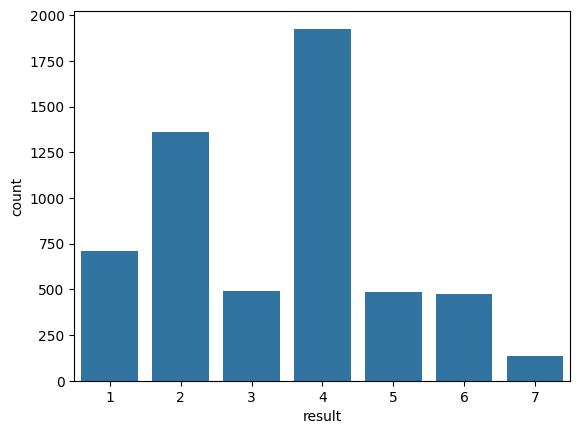

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(data = df_all, x = df_all['result'])

<Axes: xlabel='sentiment', ylabel='Count'>

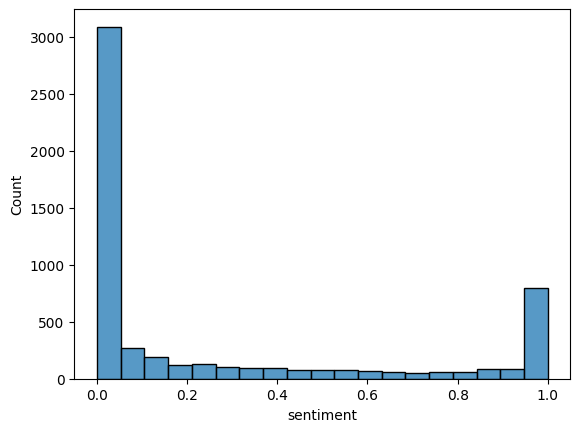

In [29]:
sns.histplot(data = df_all, x = df_all['sentiment'])

In [33]:
# # check top word counts with gpt's sentiment result < 4
# for i in ['clean_tok']:
#     df_all[i] = df_all[i].apply(lambda f: f.tolist())

# from collections import Counter
# neg_stmt = df_all[df_all['result']<4]
# neg_stmt_words = sum(neg_stmt['clean_tok'], [])
# ct_neg_words = Counter(neg_stmt_words)
# print(ct_neg_words.most_common(50))

[('货车', 2647), ('说', 2344), ('平台', 2105), ('司机', 2062), ('货', 1744), ('满满', 1596), ('帮', 1496), ('运费', 1428), ('运', 1377), ('货运', 1260), ('货主', 1243), ('现在', 1060), ('没有', 973), ('一个', 943), ('信息部', 933), ('车', 923), ('卡友', 896), ('知道', 807), ('物流', 760), ('拉', 737), ('信息', 725), ('电话', 703), ('元', 690), ('信息费', 686), ('没', 670), ('钱', 661), ('货源', 647), ('跑', 587), ('运价', 524), ('打电话', 509), ('月', 507), ('找', 500), ('拉拉', 499), ('价格', 483), ('想', 479), ('会', 474), ('装', 446), ('行业', 443), ('走', 441), ('公司', 434), ('卡友们', 421), ('今天', 419), ('公里', 401), ('市场', 397), ('低', 378), ('运输', 372), ('满帮', 368), ('装货', 364), ('吨', 358), ('卡车', 355)]


{2009: 6.0, 2010: 4.375, 2011: 4.285714285714286, 2012: 4.371428571428571, 2013: 4.745762711864407, 2014: 4.781818181818182, 2015: 3.7786561264822134, 2016: 3.208041958041958, 2017: 3.023880597014925, 2018: 2.863136863136863, 2019: 3.277511961722488, 2020: 3.5842450765864333, 2021: 3.7235494880546076, 2022: 3.82183908045977, 2023: 3.746312684365782, 2024: 4.09375}


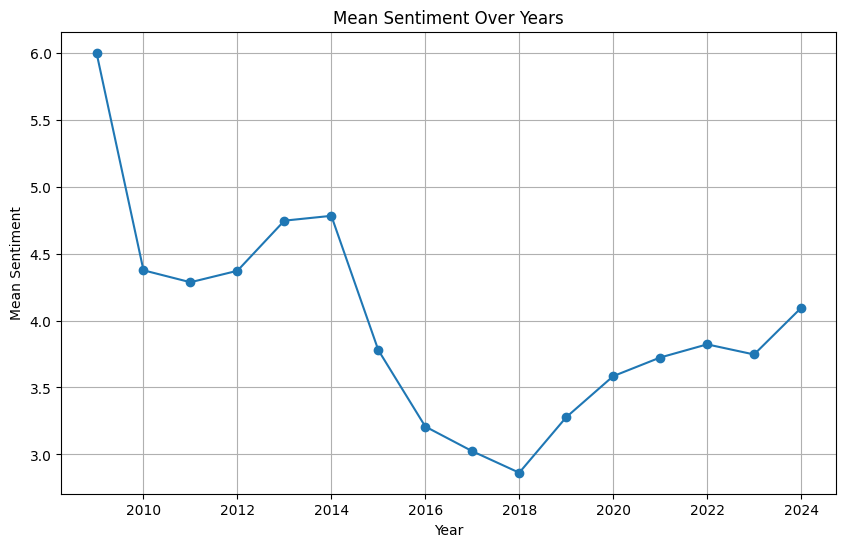

In [35]:
# average (or median) sentiment over years
df_all['year'] = df_all['date'].apply(lambda x: x[:4])
df_all['year'] = pd.to_numeric(df_all['year'])

yearly_mean_sentiment = {}
for year in sorted(df_all['year'].unique()):
    df_year = df_all[df_all['year'] == year]
    mean_stmt_year = df_year['result'].mean()
    yearly_mean_sentiment[year] = mean_stmt_year

print(yearly_mean_sentiment)

# Plot the results
years = list(yearly_mean_sentiment.keys())
mean_sentiments = list(yearly_mean_sentiment.values())

plt.figure(figsize=(10, 6))
plt.plot(years, mean_sentiments, marker='o')
plt.title('Mean Sentiment Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Sentiment')
plt.grid(True)
plt.show()


In [96]:
df_all.to_parquet('../processed_data/with_gpt_results.parquet')

# Regroup and Topic Generation

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
df_all['topic']

In [ ]:
# Divide the dataset into 20 sub-sets

# Generate group labels
group_sizes = [5583 // 20 + (1 if x < 5583 % 20 else 0) for x in range(20)]
groups = np.array([])
for i, size in enumerate(group_sizes):
    groups = np.append(groups, np.repeat(i, size))

# Shuffle the group labels to randomize
np.random.shuffle(groups)

# Assign the group labels to the DataFrame
df_all['group'] = groups
df_all.head()

In [ ]:
# Create a new dataframe with group numbers and the corresponding corpus

topic_groups = pd.DataFrame(columns=['group', 'corpus'])

for j in range(0,20):
    test_group = df_all[df_all['group']==j]
    corpus = {}
    for i in range(len(test_group)):
        id = test_group.iloc[i]['id']
        topic = test_group.iloc[i]['topic']
        corpus[str(id)] = topic
    group_j = pd.DataFrame({'group': [j], 'corpus': [corpus]})
    topic_groups = pd.concat([topic_groups, group_j])
topic_groups.info()
topic_groups['group'] = pd.to_numeric(topic_groups['group'])

In [111]:
topic_groups['group'] = pd.to_numeric(topic_groups['group'])

In [115]:
topic_groups.to_pickle('../processed_data/grouped_corpus.pkl')

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

test_group = df_all[df_all['group']==1]
for i in range(len(test_group)):
    id = test_group.iloc[i]['id']
    topic = test_group.iloc[i]['topic']
    print(f"{id}: {topic}")    

# Topic Categorization 

In [175]:
import pandas as pd
df = pd.read_parquet('../processed_data/with_gpt_results.parquet')

In [177]:
# Load in chatgpt result
import json
from pathlib import Path
fpath = Path('../theme_categorization.json')
result = json.loads(fpath.read_text())

In [ ]:
gpt_df = pd.DataFrame.from_dict(result, orient='index', columns=['explanation', 'scores', 'theme'])
gpt_df.reset_index(inplace=True)
gpt_df.rename(columns={'index': 'tid'}, inplace=True)
gpt_df['tid'] = pd.to_numeric(gpt_df['tid'])
gpt_df['theme'] = pd.to_numeric(gpt_df['theme'])
gpt_df.info()
gpt_df.head()

In [ ]:
# Merge df and gpt_df by tid
df_all = pd.merge(df, gpt_df, on='tid')
df_all.info()

In [184]:
df_all.to_parquet('../processed_data/with_gpt_results.parquet')

# Generate Sub-topics

In [ ]:
# Divide Theme 1 into 3 sub-sets

# Generate group labels
import numpy as np

group_sizes = [1096 // 3 + (1 if x < 1096 % 3 else 0) for x in range(3)]
sets = np.array([])
for i, size in enumerate(group_sizes):
    sets = np.append(sets, np.repeat(i, size))

# Shuffle the group labels to randomize
np.random.shuffle(sets)

# Assign the group labels to the DataFrame
theme_1['sets'] = sets

In [ ]:
# Create a new dataframe with group numbers and the corresponding corpus

topic_subsets = pd.DataFrame(columns=['sets', 'corpus'])

for j in range(0,3):
    test_group = theme_1[theme_1['sets']==j]
    corpus = {}
    for i in range(len(test_group)):
        id = test_group.iloc[i]['id']
        topic = test_group.iloc[i]['fulltext']
        corpus[str(id)] = topic
    group_j = pd.DataFrame({'sets': [j], 'corpus': [corpus]})
    topic_subsets = pd.concat([topic_subsets, group_j])
topic_subsets['sets'] = pd.to_numeric(topic_subsets['sets'])

In [ ]:
limit = 280
final = []

for p in range(1, 9):
    # Divide themes into chunks
    theme_p = df[df['theme'] == p].copy()
    len_p = len(theme_p)
    chunk_number_p = ((len_p - 1)//limit) + 1
    chunk_size_p = [len_p // chunk_number_p + (1 if x < len_p % chunk_number_p else 0) for x in range(chunk_number_p)]
    chunk_no = []
    for q, size in enumerate(chunk_size_p):
        chunk_no.extend([q] * size)
    np.random.shuffle(chunk_no)
    theme_p.loc[:, 'chunk_no'] = chunk_no

    # Create a new dataframe with chunk numbers and the corresponding corpus for each theme
    theme_p_chunks = pd.DataFrame(columns=['theme', 'chunk_no', 'corpus'])
    for j in range(chunk_number_p):
        theme_p_chunk_j = theme_p[theme_p['chunk_no']==j]
        corpus = {}
        for _, row in theme_p_chunk_j.iterrows():
            corpus[str(row['id'])] = row['fulltext']
        corpus = pd.DataFrame({'theme': [p], 'chunk_no': [j], 'corpus': [corpus]})
        theme_p_chunks = pd.concat([theme_p_chunks, corpus])
        theme_p_chunks.loc[:, 'chunk_no'] = pd.to_numeric(theme_p_chunks['chunk_no'])
    final.append(theme_p_chunks)
 

In [ ]:
theme_p = final[0]
theme_p_chunk_j = theme_p[theme_p['chunk_no']==1]
len(theme_p_chunk_j.iloc[0]['corpus'])

In [ ]:
def work():
    sum = 0
    
    for p in range(1, 9):
        theme_p = final[p-1]
        for j in range(theme_p['chunk_no'].max() + 1):
            theme_p_chunk_j = theme_p[theme_p['chunk_no'] == j]
            assert len(theme_p_chunk_j) == 1
            sum += len(theme_p_chunk_j.iloc[0]['corpus'])

    return sum

work()

In [ ]:
import pickle
with open('theme_with_chunks.pkl', 'wb') as fout:
    pickle.dump(final, fout)

In [ ]:
# Read in json files
# Subtheme-8
import json
with open('../subthemes-8.json', 'r') as file:
    subthemes_8 = json.load(file)

subthemes_8

# Topic Categorization-2nd Round

In [ ]:
# Data cleaning--drop id
drop_id = [2288, 3641, 3977, 4444, 4452, 4484, 4541, 4530, 4560, 4626, 4635, 4661, 4701, 4945, 4948, 4955, 4963, 
 5038, 5146, 5343, 5350, 5375, 5454, 5498, 5504, 5530, 5567, 49, 823, 1272, 1315]

drop_df = df['id'].isin(drop_id)
df = df[~drop_df]

In [527]:
import pandas as pd
df = pd.read_parquet('../processed_data/with_gpt_results.parquet')

In [528]:
# Load in chatgpt result
import json
from pathlib import Path
fpath = Path('../processed_data/theme_categorization_2nd_round.json')
result = json.loads(fpath.read_text())

In [533]:
gpt_df = pd.DataFrame.from_dict(result, orient='index', columns=['explanation', 'scores', 'theme'])
gpt_df.reset_index(inplace=True)
gpt_df.rename(columns={'index': 'id',
                      'explanation': 'explanation_2',
                      'scores': 'scores_2',
                    'theme': 'new_theme'
                      }, inplace=True)
gpt_df['id'] = pd.to_numeric(gpt_df['id'])
gpt_df['theme'] = pd.to_numeric(gpt_df['theme'])
gpt_df.info()
gpt_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5552 entries, 0 to 5551
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             5552 non-null   int64 
 1   explanation_2  5552 non-null   object
 2   scores_2       5552 non-null   object
 3   new_theme      5552 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 173.6+ KB


,id,explanation_2,scores_2,new_theme
0,9,"This text describes an individual's frustrating experience with the Huolala (货拉拉) platform, where they found a freight order to Shanxi but ended up being scammed after paying a deposit and information fee. The person expresses anger and confusion about what to do next. Given this context, the text most directly addresses the theme of 'Fraudulence, disputes, and platform mediation,' as it involves an experience of being scammed and the emotional response to such an event. The relevance scores for other themes are lower as the text specifically focuses on a fraudulent incident rather than broadly discussing industry regulations, community solidarity, or general industry challenges.","[1, 1, 2, 9, 2, 1, 1]",4
1,18,"The text discusses Huolala's upcoming launch of a new business to compete in the same-city delivery market against platforms like Meituan and SF Express. This information falls primarily under general discussions about the industry and platforms, as it talks about market competition and the strategic moves of a freight platform. It does not directly touch upon vehicle selection, pricing and profitability, platform fees and service issues, fraudulence, disputes-mediation, regulation-governance, or community and solidarity among truck drivers. However, the mention of competition might have indirect implications for these areas, although they are not explicitly discussed in the provided text.","[0, 0, 0, 0, 0, 0, 9]",7
2,21,"The text describes a situation where four freight transportation platforms (Manbang Group, Huolala, Didi Freight, and Kuaidi Dache) have been summoned for a meeting to address issues such as malicious price undercutting. The platforms have committed to taking responsibility for rectifying the situation by improving complaint channels for truck drivers, resolving issues such as delayed payment of freight charges, and ensuring fair competition and protection of truck drivers' legal rights, including the enjoyment of toll fee reductions. This falls directly under the theme of 'Regulation and Governance' as it discusses government intervention in the freight platform industry to regulate practices and ensure the welfare of truck drivers.","[0, 0, 2, 1, 9, 0, 0]",5
3,6,"The text discusses the current situation of the Huolala freight platform, a popular choice among logistics services in China, and how drivers are coping with recent changes and measures introduced by the platform. This context suggests that the text covers an analysis or discussion related to the operational aspects of the platform and drivers' responses to these changes. The mention of providing strategies for coping with the platform's current state indicates a focus on navigating platform features and addressing drivers' concerns rather than discussing pricing, regulation, or community actions directly. Therefore, the theme of 'Platform Fees and Service Issues' seems most relevant because it encompasses discussions around platform changes and drivers' experience interacting with customer service or coping with platform-specific challenges.","[3, 2, 7, 4, 2, 4, 5]",3
4,24,"The text discusses the intervention by the transport authorities concerning issues on freight transportation platforms such as 'cut-throat competition, multiple charges, and illegal operations' that harm the truck drivers' legitimate rights. It mentions a meeting that took place addressing these issues with multiple freight platforms. The content signifies government agencies' actions towards regulating the freight platforms to protect truck drivers' rights and implies a call for deeper understanding and listening to those affected (the victims) by platform malpractices. Therefore, this text predominantly relates to state activities or policies in regulating freight platforms and suggests an improvement in the freight industry through these interventions. This analysis fits best with the theme of 'Regulation and Governance', as 

In [535]:
# Merge df and gpt_df by tid
df_all = pd.merge(df, gpt_df, on='id')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5552 entries, 0 to 5551
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5552 non-null   int64  
 1   tid            5552 non-null   int64  
 2   author         5552 non-null   object 
 3   description    5552 non-null   object 
 4   image          5552 non-null   object 
 5   replies        5552 non-null   int64  
 6   timestamp      5552 non-null   int64  
 7   title          5552 non-null   object 
 8   views          5552 non-null   int64  
 9   date           5552 non-null   object 
 10  thread_url     5552 non-null   object 
 11  pc_thread_url  5552 non-null   object 
 12  nickname       5552 non-null   object 
 13  circleId       5552 non-null   object 
 14  circleName     5552 non-null   object 
 15  threadType     5552 non-null   int64  
 16  topicId        5552 non-null   object 
 17  topicName      5552 non-null   object 
 18  images  

In [536]:
df_all.rename(columns={'result': 'gpt_sentiment'}, inplace=True)

In [537]:
df_all.to_parquet('../processed_data/with_gpt_results_2nd_round.parquet')